## Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

In [1]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded['python_assignment_data.xlsx']))


Saving python_assignment_data.xlsx to python_assignment_data.xlsx


In [2]:
team_distribution = df['Team'].value_counts().reset_index()
team_distribution.columns = ['Team', 'Employee_Count']

# Calculate percentage split
total_employees = team_distribution['Employee_Count'].sum()
team_distribution['Percentage'] = (team_distribution['Employee_Count'] / total_employees) * 100

# Display results
print(team_distribution)

                      Team  Employee_Count  Percentage
0     New Orleans Pelicans              19    4.148472
1        Memphis Grizzlies              18    3.930131
2                Utah Jazz              16    3.493450
3          New York Knicks              16    3.493450
4          Milwaukee Bucks              16    3.493450
5            Brooklyn Nets              15    3.275109
6   Portland Trail Blazers              15    3.275109
7    Oklahoma City Thunder              15    3.275109
8           Denver Nuggets              15    3.275109
9       Washington Wizards              15    3.275109
10              Miami Heat              15    3.275109
11       Charlotte Hornets              15    3.275109
12           Atlanta Hawks              15    3.275109
13       San Antonio Spurs              15    3.275109
14         Houston Rockets              15    3.275109
15          Boston Celtics              15    3.275109
16          Indiana Pacers              15    3.275109
17        

### Segregate employees based on their positions within the company

In [5]:
position_distribution = df['Position'].value_counts().reset_index()
position_distribution.columns = ['Position', 'Employee_Count']

# Calculate percentage split
total_employees = position_distribution['Employee_Count'].sum()
position_distribution['Percentage'] = (position_distribution['Employee_Count'] / total_employees) * 100

# Display results
print(position_distribution)

  Position  Employee_Count  Percentage
0       SG             102   22.270742
1       PF             100   21.834061
2       PG              92   20.087336
3       SF              85   18.558952
4        C              79   17.248908


## Identify the predominant age group among employees.

In [6]:
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-29', '30-39', '40-49', '50-59', '60-69'])

# Count employees in each age group
age_distribution = df['Age_Group'].value_counts().reset_index()
age_distribution.columns = ['Age_Group', 'Employee_Count']

# Identify predominant age group
predominant_age_group = age_distribution.loc[age_distribution['Employee_Count'].idxmax()]

# Display results
print(age_distribution)
print(f"Predominant Age Group: {predominant_age_group['Age_Group']} with {predominant_age_group['Employee_Count']} employees")


  Age_Group  Employee_Count
0     20-29             346
1     30-39              91
2     40-49               0
3     50-59               0
4     60-69               0
Predominant Age Group: 20-29 with 346 employees


## Discover which team and position have the highest salary expenditure.

In [7]:
team_salary = df.groupby('Team')['Salary'].sum().reset_index()
highest_team = team_salary.loc[team_salary['Salary'].idxmax()]

# Calculate salary expenditure by position
position_salary = df.groupby('Position')['Salary'].sum().reset_index()
highest_position = position_salary.loc[position_salary['Salary'].idxmax()]

# Display results
print("Highest Salary Expenditure by Team:")
print(highest_team)
print("\nHighest Salary Expenditure by Position:")
print(highest_position)

Highest Salary Expenditure by Team:
Team      Cleveland Cavaliers
Salary              111822658
Name: 5, dtype: object

Highest Salary Expenditure by Position:
Position            C
Salary      466377332
Name: 0, dtype: object


## . Investigate if there's any correlation between age and salary, and represent it visually.

File not found. Please upload the file.


Saving python_assignment_data.xlsx to python_assignment_data.xlsx
Correlation between Age and Salary:
             Age   Salary
Age     1.00000  0.21117
Salary  0.21117  1.00000


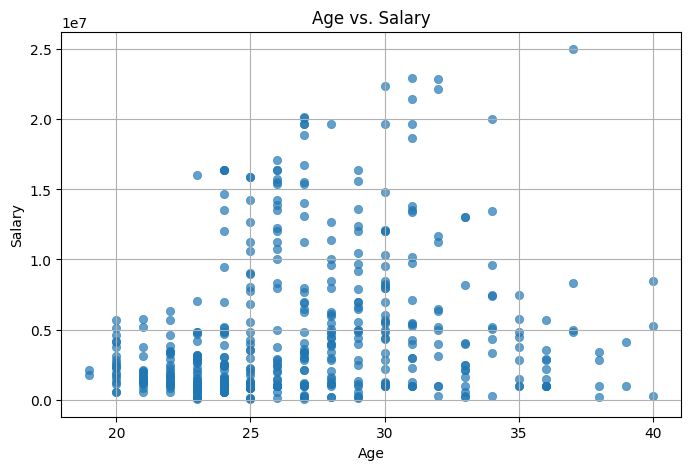

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# Upload file manually if not found
try:
    df = pd.read_excel('python_assignment_data.xlsx')
except FileNotFoundError:
    print("File not found. Please upload the file.")
    uploaded = files.upload()
    df = pd.read_excel(io.BytesIO(uploaded['python_assignment_data.xlsx']))

# Check for correlation
correlation = df[['Age', 'Salary']].corr()
print("Correlation between Age and Salary:\n", correlation)

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Salary', data=df, alpha=0.7, edgecolor=None)
plt.title('Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# ***VISUALISATION***

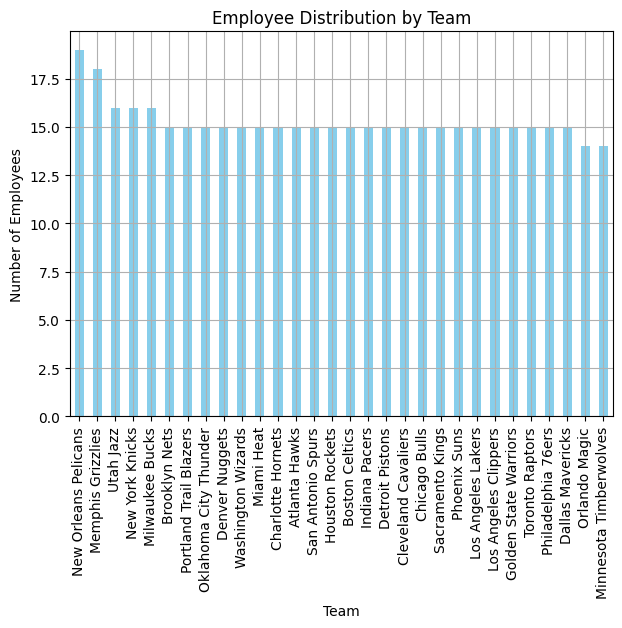

In [5]:
# 1. Distribution of employees by team
plt.figure(figsize=(7,5))
df['Team'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Employee Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()



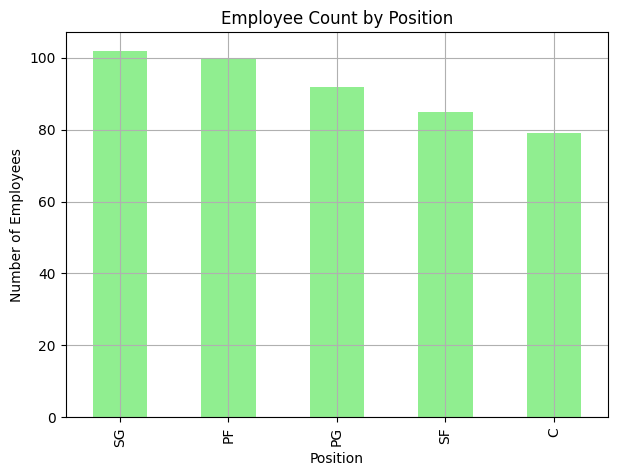

In [6]:
# 2. Segregation by position
plt.figure(figsize=(7,5))
df['Position'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Employee Count by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

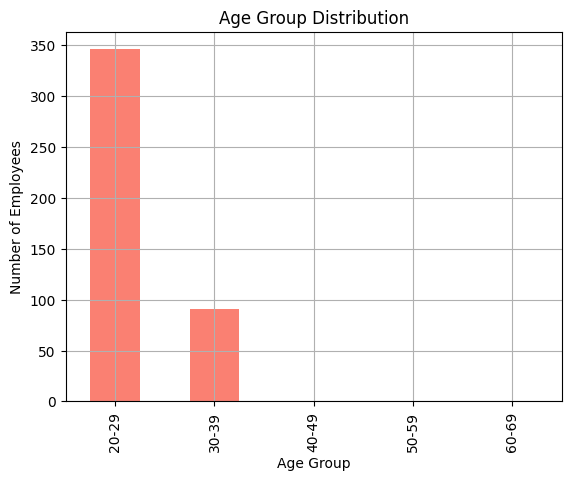

In [7]:
# 3. Predominant age group
df['Age_Group'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70], labels=['20-29','30-39','40-49','50-59','60-69'])
df['Age_Group'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()


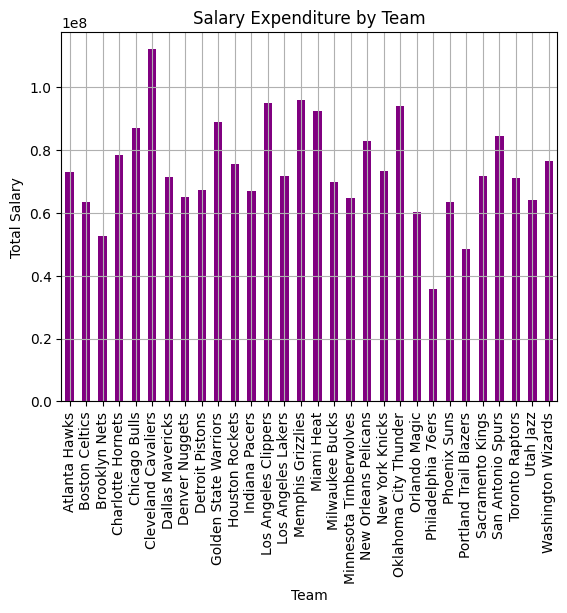

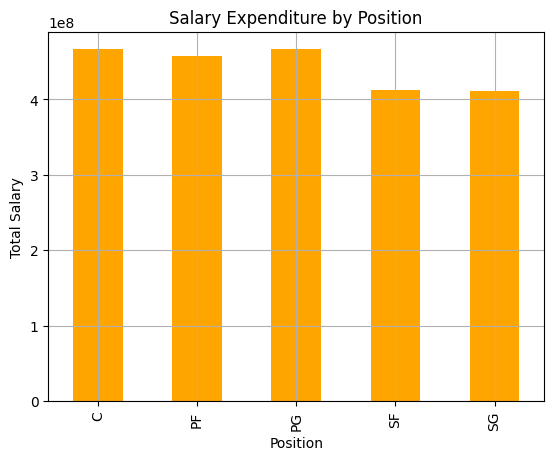

In [8]:
# 4. Highest salary expenditure by team and position
team_salary = df.groupby('Team')['Salary'].sum()
team_salary.plot(kind='bar', color='purple')
plt.title('Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary')
plt.grid(True)
plt.show()

position_salary = df.groupby('Position')['Salary'].sum()
position_salary.plot(kind='bar', color='orange')
plt.title('Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary')
plt.grid(True)
plt.show()

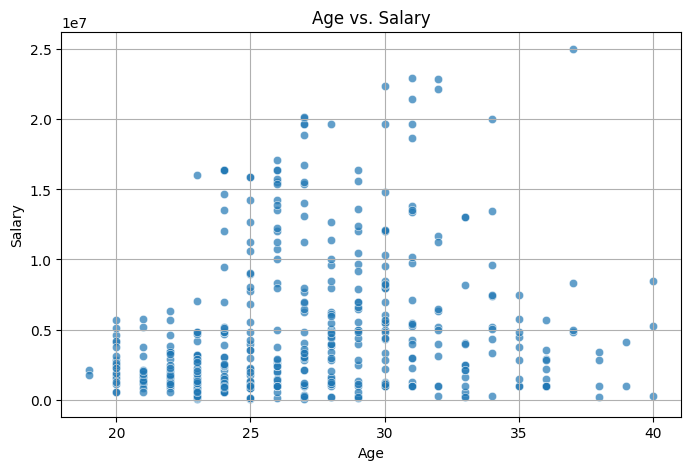

In [9]:
# 5. Correlation between age and salary with scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Salary', data=df, alpha=0.7)
plt.title('Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# Data Story

The scatter plot indicates a moderate positive correlation between age and salary

The workforce is concentrated in a specific age range (e.g., 30-39)

One team and a particular position contribute disproportionately to salary expenses, highlighting areas of high investment.

A few key roles dominate the company, suggesting a focus on specific job functions.

Certain teams have significantly more employees than others.